In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil
from scipy.stats import zscore

In [110]:
df = pd.read_csv('Electric_Vehicles.csv')

In [111]:
df.tail(5)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter
1319,User_1320,Nissan Leaf,120.447195,Station_128,Los Angeles,2024-02-24 23:00:00,2024-02-24 23:56:00,63.652570,3.740970,33.704226,10.863674,Evening,Monday,59.338076,56.692439,14.449236,-6.966593,5.0,DC Fast Charger,Commuter


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

### Data Processing

Besides float644, there are a lot of object Dtypes which can be converted to their respective variables which take up less memory, and improve model performance compared to object Dtype.

In [113]:
df = df.astype({
    'User ID': 'str',
    'Vehicle Model': 'category',
    'Charging Station ID': 'str',
    'Charging Station Location': 'category',
    'Charging Start Time': 'datetime64[ns]',
    'Charging End Time': 'datetime64[ns]',
    'Time of Day': 'category',
    'Day of Week': 'category',
    'Charger Type': 'category',
    'User Type': 'category'
})

print(df.dtypes)

User ID                                             object
Vehicle Model                                     category
Battery Capacity (kWh)                             float64
Charging Station ID                                 object
Charging Station Location                         category
Charging Start Time                         datetime64[ns]
Charging End Time                           datetime64[ns]
Energy Consumed (kWh)                              float64
Charging Duration (hours)                          float64
Charging Rate (kW)                                 float64
Charging Cost (USD)                                float64
Time of Day                                       category
Day of Week                                       category
State of Charge (Start %)                          float64
State of Charge (End %)                            float64
Distance Driven (since last charge) (km)           float64
Temperature (°C)                                   float

Potentially need to do target encoding later on. 

In [114]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [115]:
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']] = df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].fillna(df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].median())

In [116]:
df.isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

Successfully filled in all missing values with their respective median. 

In [117]:
print(df.dtypes)

User ID                                             object
Vehicle Model                                     category
Battery Capacity (kWh)                             float64
Charging Station ID                                 object
Charging Station Location                         category
Charging Start Time                         datetime64[ns]
Charging End Time                           datetime64[ns]
Energy Consumed (kWh)                              float64
Charging Duration (hours)                          float64
Charging Rate (kW)                                 float64
Charging Cost (USD)                                float64
Time of Day                                       category
Day of Week                                       category
State of Charge (Start %)                          float64
State of Charge (End %)                            float64
Distance Driven (since last charge) (km)           float64
Temperature (°C)                                   float

In [118]:
#verifying that within each column they all follow the same kind
for col in df:
    print(df[col].unique())

['User_1' 'User_2' 'User_3' ... 'User_1318' 'User_1319' 'User_1320']
['BMW i3', 'Hyundai Kona', 'Chevy Bolt', 'Nissan Leaf', 'Tesla Model 3']
Categories (5, object): ['BMW i3', 'Chevy Bolt', 'Hyundai Kona', 'Nissan Leaf', 'Tesla Model 3']
[108.46300741 100.          75.          50.          85.
  62.          97.68181223  79.79920376  48.79648264  76.87610038
  69.88407425 124.31591139  59.83272651  48.05069473  24.59992215
  77.29894529  95.15365777 147.39535434  63.09631665  93.27378067
  48.46959856  93.09486955  50.87061708  58.0121307  102.94949428
  95.69778087 102.83943001  89.03206383  81.65318205  46.5379115
  27.03325783 120.51063277  94.82402915  45.38021848 143.47520974
  10.18928677  78.38373536  65.04709891  33.37702357  59.79413925
   6.16889584  45.62653203  77.60847805  48.63693125  60.78928025
  71.64548707  46.87679655  69.44504561   3.9765965    1.53280653
  67.54202075 127.28027404 107.43195455  52.33224826  39.29742253
 129.52415942   3.83851807  78.84320421 104.

In [119]:
# Check for logical inconsistencies
inconsistent_charge = df[df['State of Charge (Start %)'] > df['State of Charge (End %)']]
print("Inconsistent Charge:")
print("There are", len(inconsistent_charge), "instances of inconsistent charges where \nstarting charge is > ending charge somehow.")


print("Inconsistent Stations:")
inconsistent_stations = df.groupby('Charging Station ID')['Charging Station Location'].nunique()
inconsistent_stations = inconsistent_stations[inconsistent_stations > 1]
print('\n')
print(inconsistent_stations)


print('\n')
df[df['Charging Station ID'] == 'Station_1']


Inconsistent Charge:
There are 268 instances of inconsistent charges where 
starting charge is > ending charge somehow.
Inconsistent Stations:


Charging Station ID
Station_1      3
Station_10     4
Station_100    2
Station_101    3
Station_103    4
              ..
Station_93     3
Station_96     2
Station_97     5
Station_98     2
Station_99     2
Name: Charging Station Location, Length: 335, dtype: int64




,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
88,User_89,BMW i3,85.0,Station_1,Los Angeles,2024-01-04 16:00:00,2024-01-04 17:56:00,33.072950,1.469660,30.344748,15.550838,Evening,Wednesday,105.032224,83.023473,164.682892,-6.514432,1.00000,Level 2,Long-Distance Traveler
793,User_794,Nissan Leaf,75.0,Station_1,Chicago,2024-02-03 01:00:00,2024-02-03 03:40:00,74.826446,1.398582,43.133283,26.218718,Evening,Sunday,23.725996,53.813699,238.743561,30.955969,3.04357,Level 2,Long-Distance Traveler
1171,User_1172,Nissan Leaf,50.0,Station_1,New York,2024-02-18 19:00:00,2024-02-18 22:35:00,45.364578,0.564110,25.041460,33.712647,Afternoon,Thursday,39.082326,91.733706,109.931915,37.330822,5.00000,DC Fast Charger,Commuter


In [120]:
# Check for negative values
print("\n\nRows with Negative Energy Consumed:")
print(df[df['Energy Consumed (kWh)'] < 0])

print("\n\nRows with Negative Temperature:")
print(df[df['Temperature (°C)'] < 0])

print("\n\nRows with Negative Distance Driven:")
print(df[df['Distance Driven (since last charge) (km)'] < 0])



Rows with Negative Energy Consumed:
Empty DataFrame
Columns: [User ID, Vehicle Model, Battery Capacity (kWh), Charging Station ID, Charging Station Location, Charging Start Time, Charging End Time, Energy Consumed (kWh), Charging Duration (hours), Charging Rate (kW), Charging Cost (USD), Time of Day, Day of Week, State of Charge (Start %), State of Charge (End %), Distance Driven (since last charge) (km), Temperature (°C), Vehicle Age (years), Charger Type, User Type]
Index: []


Rows with Negative Temperature:
        User ID  Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
4        User_5   Hyundai Kona               50.000000         Station_108   
5        User_6    Nissan Leaf               50.000000         Station_335   
7        User_8     Chevy Bolt               75.000000         Station_302   
15      User_16    Nissan Leaf              100.000000         Station_147   
21      User_22   Hyundai Kona               62.000000         Station_485   
...         .

There are no rows for negative energy consumed and negative distance driven.



### Check for outliers.

In [121]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [122]:
print(df.columns)

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')


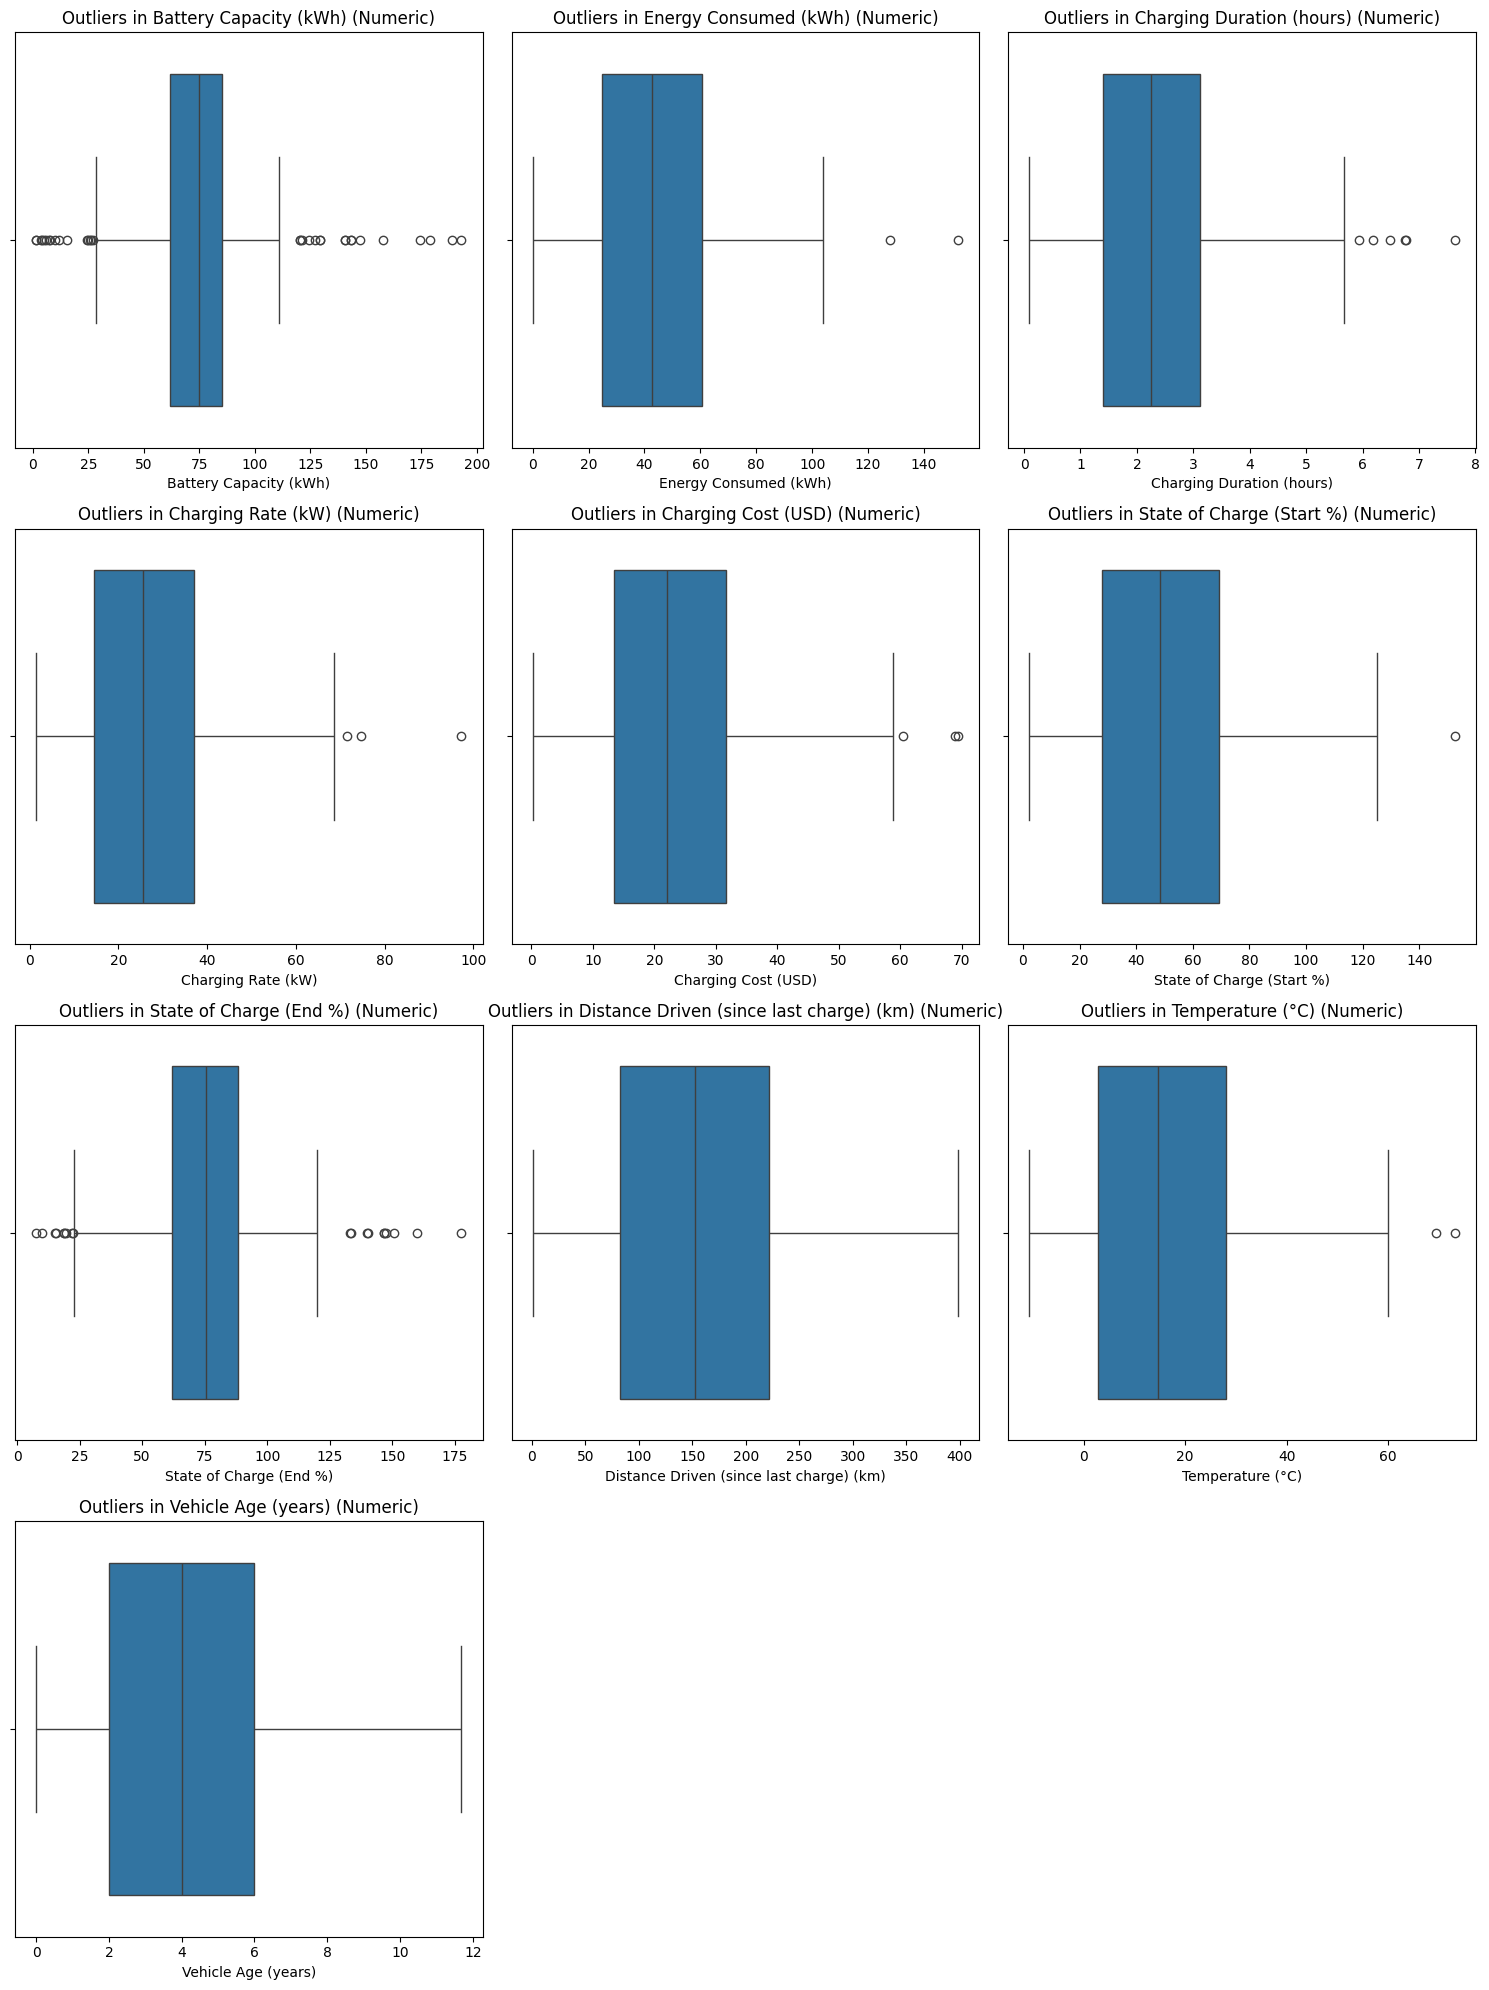

In [123]:
def detect_outliers_numeric(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find the outliers for the column
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
    return outliers


def plot_outliers(df, numeric_outliers):
    # Combine all outliers to calculate the number of subplots needed
    all_outliers = list(numeric_outliers.keys())
    
    num_columns = 3  # Choose the number of columns for subplot
    num_rows = (len(all_outliers) // num_columns) + (1 if len(all_outliers) % num_columns > 0 else 0)
    
    # Create subplots grid
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier

    idx = 0  # Index for subplot iteration
    
    # Plot numeric outliers (boxplots)
    for col in numeric_outliers:
        sns.boxplot(x=df[col], ax=axes[idx])
        axes[idx].set_title(f"Outliers in {col} (Numeric)")
        idx += 1
    

    # Hide any remaining unused subplots
    for j in range(idx, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


numeric_outliers = detect_outliers_numeric(df)

plot_outliers(df, numeric_outliers)

In [ ]:
df.info()

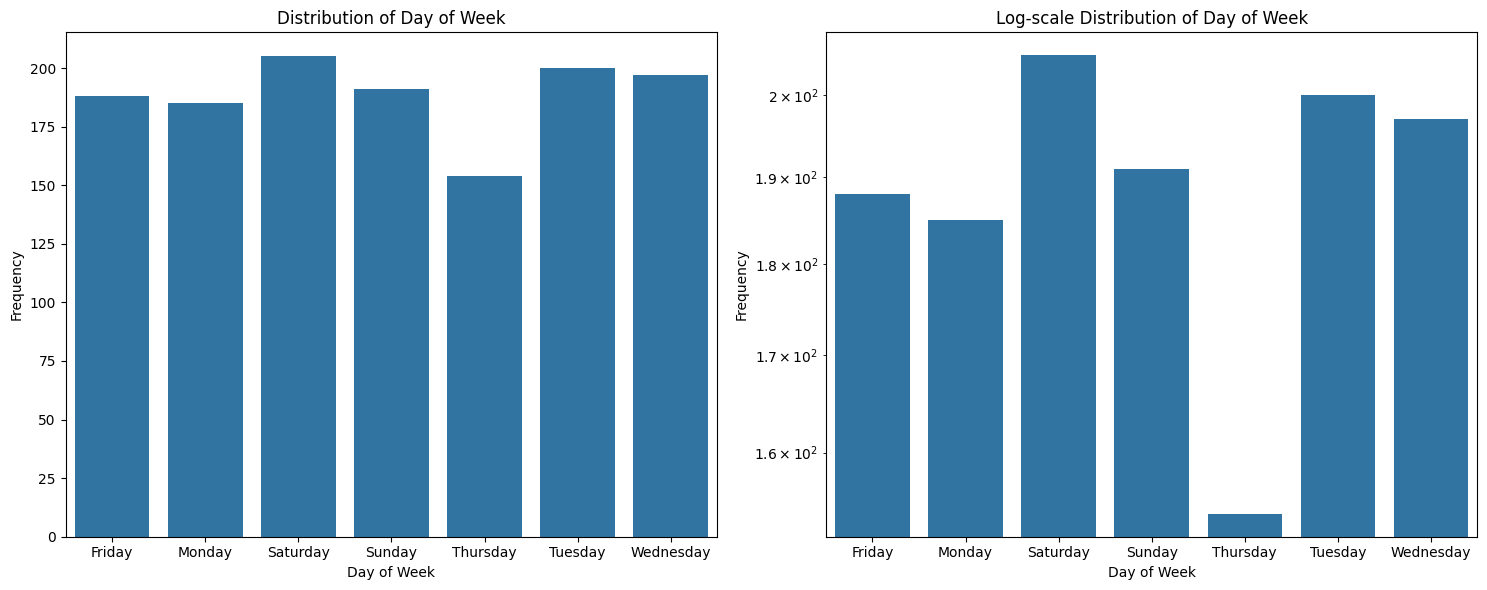

Number of occurrences of 'Thursday': 154 out of 1320 total values.


In [168]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

titles = ['Distribution of Day of Week', 'Log-scale Distribution of Day of Week']
yscales = [None, 'log']

for ax, title, yscale in zip(axes, titles, yscales):
    sns.countplot(data=df, x='Day of Week', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Frequency')
    if yscale:  # Apply log scale if specified
        ax.set_yscale(yscale)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


thursday_count = df['Day of Week'].value_counts().get('Thursday', 0)
print(f"Number of occurrences of 'Thursday': {thursday_count}" + " out of 1320 total values.")

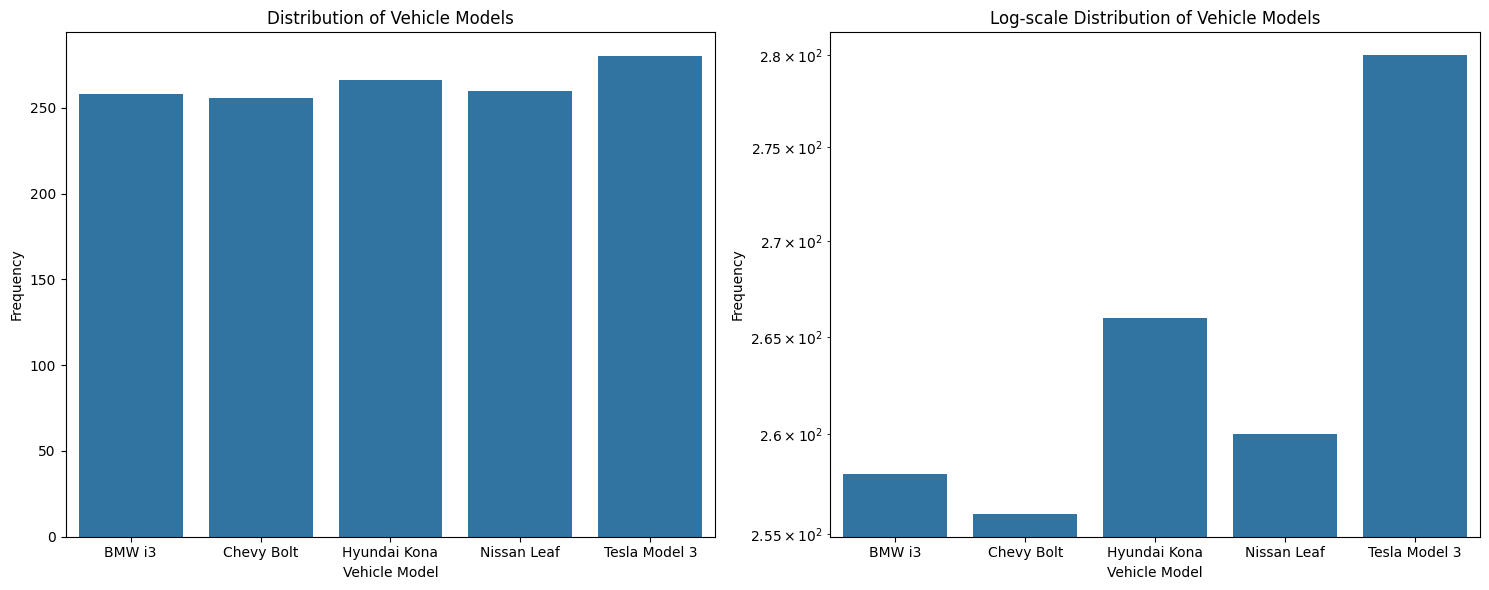

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

titles = ['Distribution of Vehicle Models', 'Log-scale Distribution of Vehicle Models']
yscales = [None, 'log']

for ax, title, yscale in zip(axes, titles, yscales):
    sns.countplot(data=df, x='Vehicle Model', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Vehicle Model')
    ax.set_ylabel('Frequency')
    if yscale:  # Apply log scale if specified
        ax.set_yscale(yscale)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

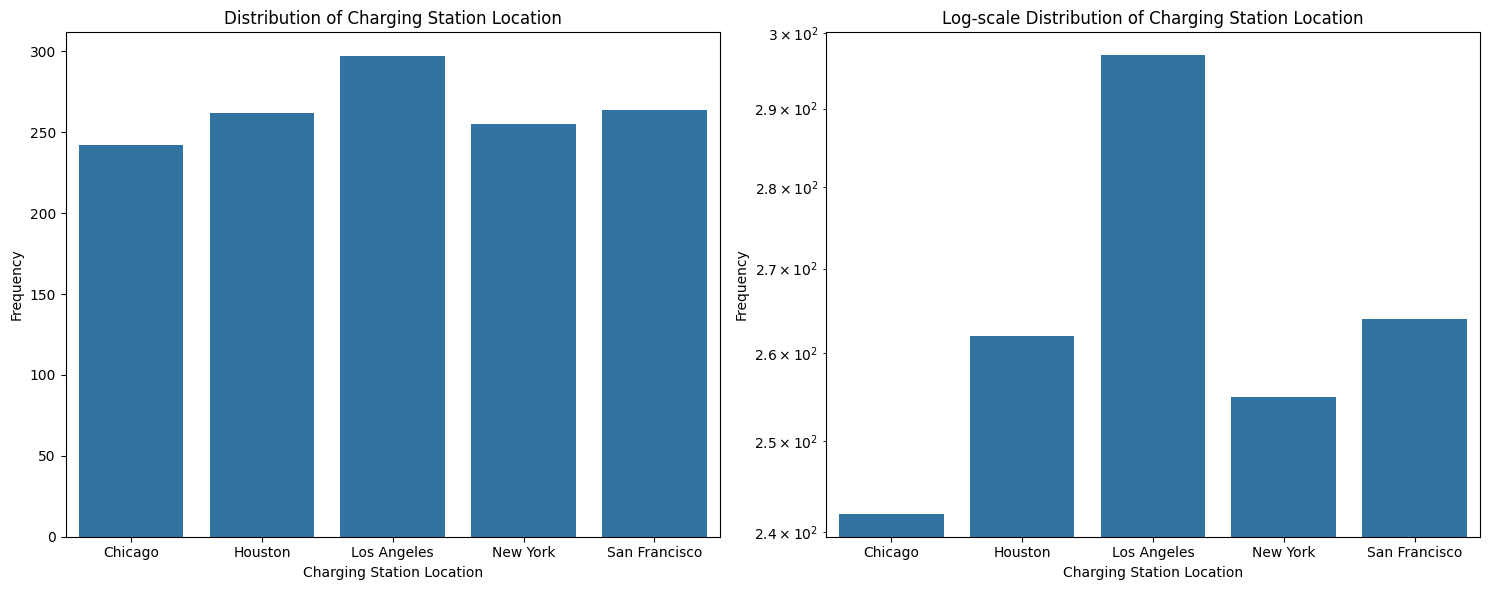

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

titles = ['Distribution of Charging Station Location', 'Log-scale Distribution of Charging Station Location']
yscales = [None, 'log']

for ax, title, yscale in zip(axes, titles, yscales):
    sns.countplot(data=df, x='Charging Station Location', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Charging Station Location')
    ax.set_ylabel('Frequency')
    if yscale:  # Apply log scale if specified
        ax.set_yscale(yscale)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

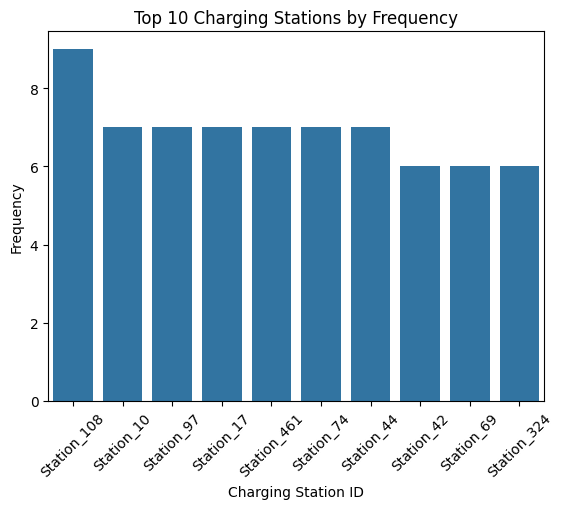

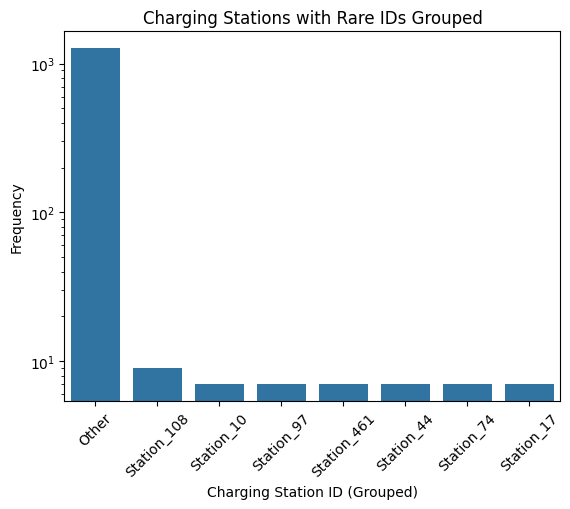

In [171]:
# Get the top 10 Charging Station IDs by frequency
top_n = 10
top_station_counts = df['Charging Station ID'].value_counts().head(top_n)

# Plot the top N Charging Station IDs
sns.barplot(x=top_station_counts.index, y=top_station_counts.values)
plt.title(f"Top {top_n} Charging Stations by Frequency")
plt.xlabel("Charging Station ID")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



# Group rare IDs into "Others"
threshold = 7  # IDs with fewer than 7 occurrences will be grouped
df['Station Grouped'] = df['Charging Station ID'].apply(
    lambda x: x if df['Charging Station ID'].value_counts()[x] >= threshold else 'Other'
)

# Plot grouped Charging Stations
sns.countplot(data=df, x='Station Grouped', order=df['Station Grouped'].value_counts().index)
plt.title("Charging Stations with Rare IDs Grouped")
plt.xlabel("Charging Station ID (Grouped)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


In [174]:
df[df['Charging Station ID'] == 'Station_108']

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Station Grouped
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,...,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.000000,Level 1,Long-Distance Traveler,Station_108
206,User_207,Hyundai Kona,85.000000,Station_108,Houston,2024-01-09 14:00:00,2024-01-09 14:59:00,70.994717,0.776358,12.561412,...,Morning,Friday,72.895248,68.051103,189.378665,4.756516,7.000000,Level 1,Long-Distance Traveler,Station_108
298,User_299,BMW i3,75.000000,Station_108,Houston,2024-01-13 10:00:00,2024-01-13 12:38:00,23.993961,3.269542,32.933971,...,Evening,Tuesday,87.852263,75.363988,205.170242,5.918021,5.000000,Level 2,Long-Distance Traveler,Station_108
620,User_621,Hyundai Kona,121.211892,Station_108,San Francisco,2024-01-26 20:00:00,2024-01-26 22:54:00,66.705236,1.895220,6.513657,...,Night,Wednesday,56.717972,83.646182,166.624444,32.847220,7.000000,Level 2,Commuter,Station_108
672,User_673,Hyundai Kona,50.000000,Station_108,New York,2024-01-29 00:00:00,2024-01-29 01:35:00,78.983579,2.904071,37.479173,...,Evening,Sunday,30.855324,89.888898,222.761718,9.568915,0.000000,DC Fast Charger,Commuter,Station_108
959,User_960,Tesla Model 3,100.000000,Station_108,Houston,2024-02-09 23:00:00,2024-02-10 00:27:00,72.089243,2.496163,7.494576,...,Night,Friday,22.900508,94.208255,87.678718,3.927032,4.000000,Level 1,Long-Distance Traveler,Station_108
1178,User_1179,Hyundai Kona,50.000000,Station_108,Houston,2024-02-19 02:00:00,2024-02-19 04:09:00,5.755525,2.290447,39.127025,...,Evening,Monday,63.615569,73.807350,107.669044,18.962712,3.000000,DC Fast Charger,Commuter,Station_108
1190,User_1191,Hyundai Kona,50.000000,Station_108,Houston,2024-02-19 14:00:00,2024-02-19 14:33:00,42.691405,2.287832,21.672226,...,Afternoon,Saturday,58.687367,84.960096,116.655078,-3.112536,1.000000,DC Fast Charger,Casual Driver,Station_108
1265,User_1266,BMW i3,100.000000,Station_108,Chicago,2024-02-22 17:00:00,2024-02-22 20:09:00,60.831104,3.574189,48.321236,...,Morning,Wednesday,26.450247,83.898867,29.674901,3.171792,6.561021,Level 2,Casual Driver,Station_108


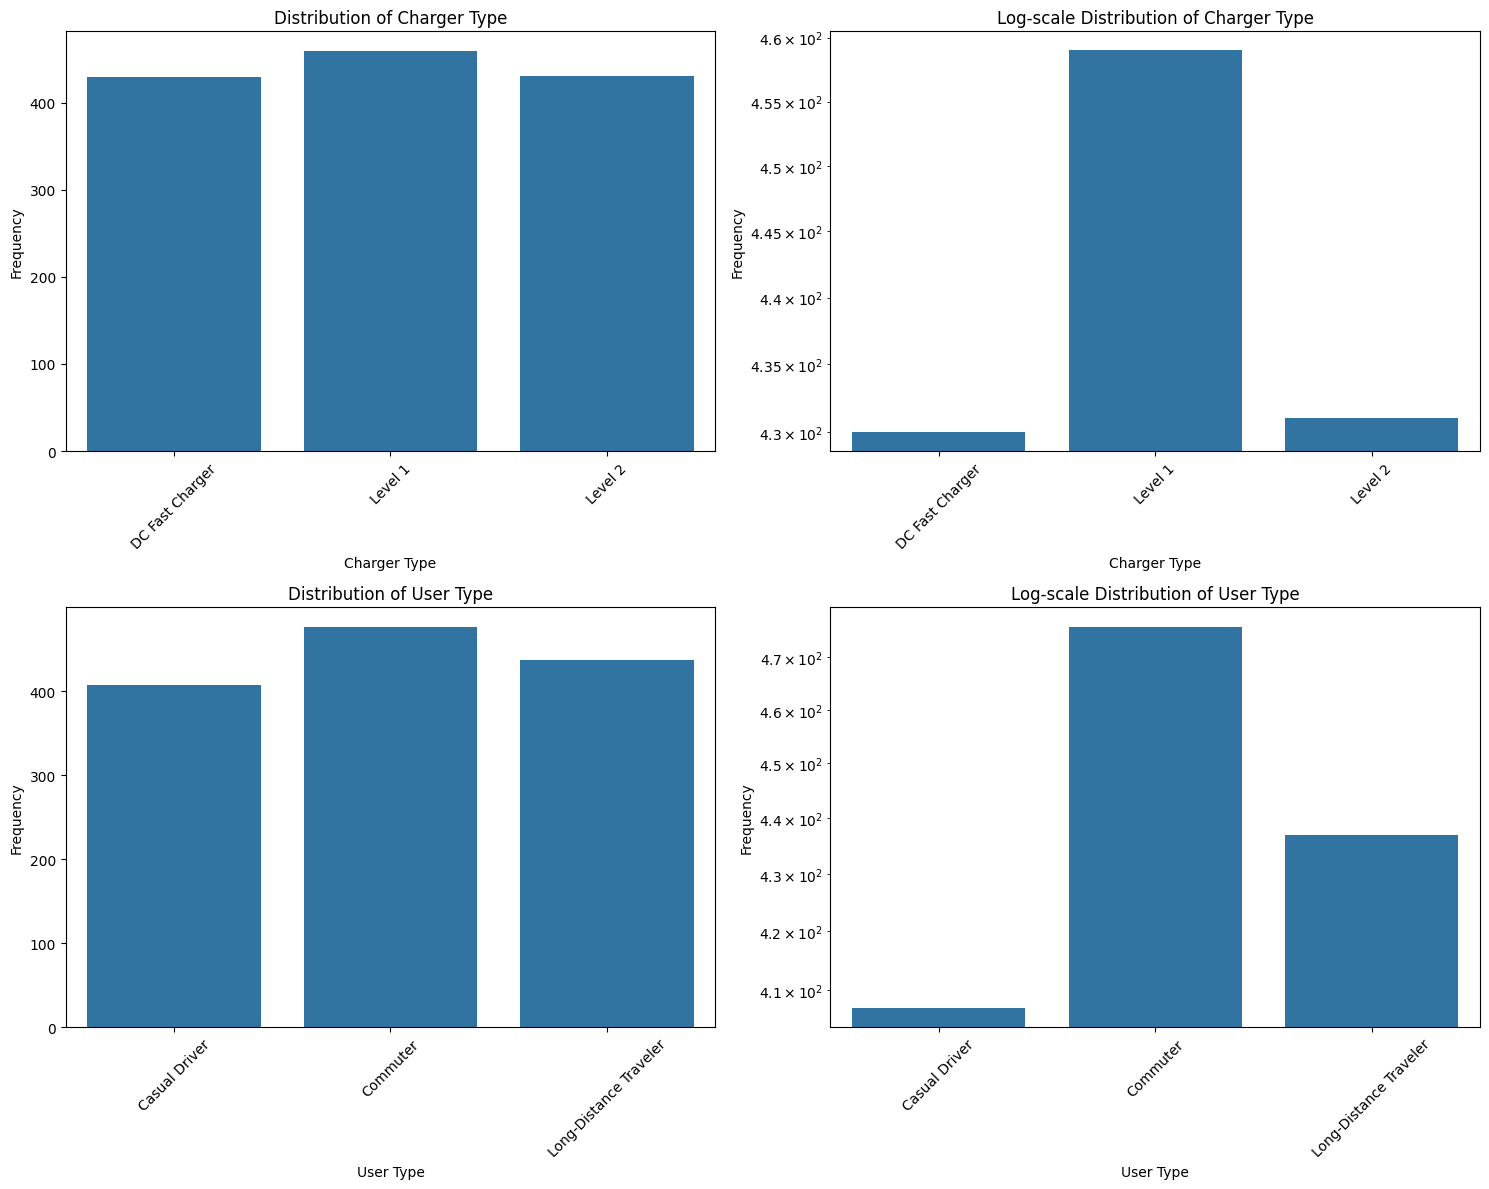

In [177]:
features = ['Charger Type', 'Charger Type', 'User Type', 'User Type']

# Titles and scales for each feature
titles = [
    'Distribution of Charger Type', 
    'Log-scale Distribution of Charger Type', 
    'Distribution of User Type', 
    'Log-scale Distribution of User Type'
]
yscales = [None, 'log', None, 'log']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust figsize for better clarity

# Flatten axes to iterate easily
axes = axes.flatten()

# Iterate over each feature, title, scale, and axis
for ax, feature, title, yscale in zip(axes, features, titles, yscales):
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    if yscale:  # Apply log scale if specified
        ax.set_yscale(yscale)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


### Feature engineering. 

- charging cost per kWh
- how much charge is actually being added during the process --> identify inefficiences/charging behaviour
- ave energy consumed per charging station / freq of charges per station
- isWeekend --> dist. bw weekend/weekday behaviour
